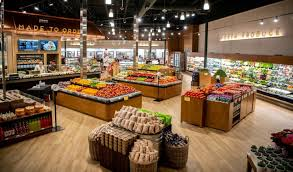

# **SUPERSTORE SALES ANALYSIS**

**This notebook analyzes sales data to identify the best performing segments, regions and products and those to avoid or to review.**

Dataset's link: [./Superstore Sales Dataset.csv](http://)

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuring visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Loading and Previewing Data

In [ ]:
# Loading data with windows-1252 encoding
df = pd.read_csv('./Superstore Sales Dataset.csv', encoding='windows-1252')

# Date conversion
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Display
display(df.head())
print(df.info())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## 2. Regional Analysis
The aim here is to determine which regions are the most profitable.

,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
South,391721.9050,46749.4303
Central,501239.8908,39706.3625


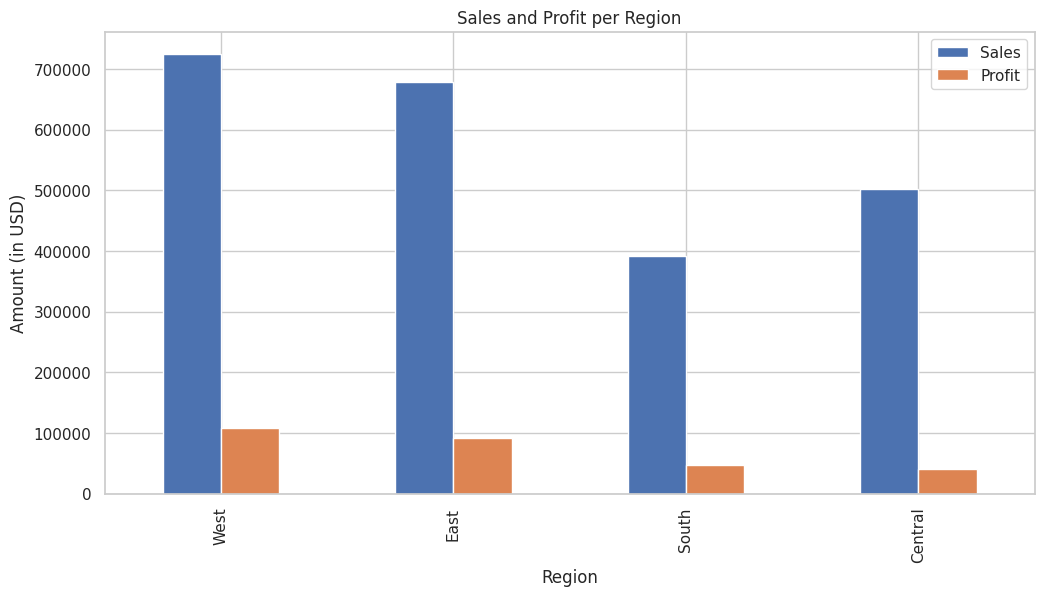

In [3]:
region_analysis = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False)
display(region_analysis)

# Visualization
region_analysis.plot(kind='bar', title='Sales and Profit per Region')
plt.ylabel('Amount (in USD)')
plt.show()

***Interpretation:*** We can see that **the West region achieves both the highest sales and profits**. It was followed by the East region.

## 3. Analysis by Category and Subcategory
Now, we will identify the categories to promote and those to review.

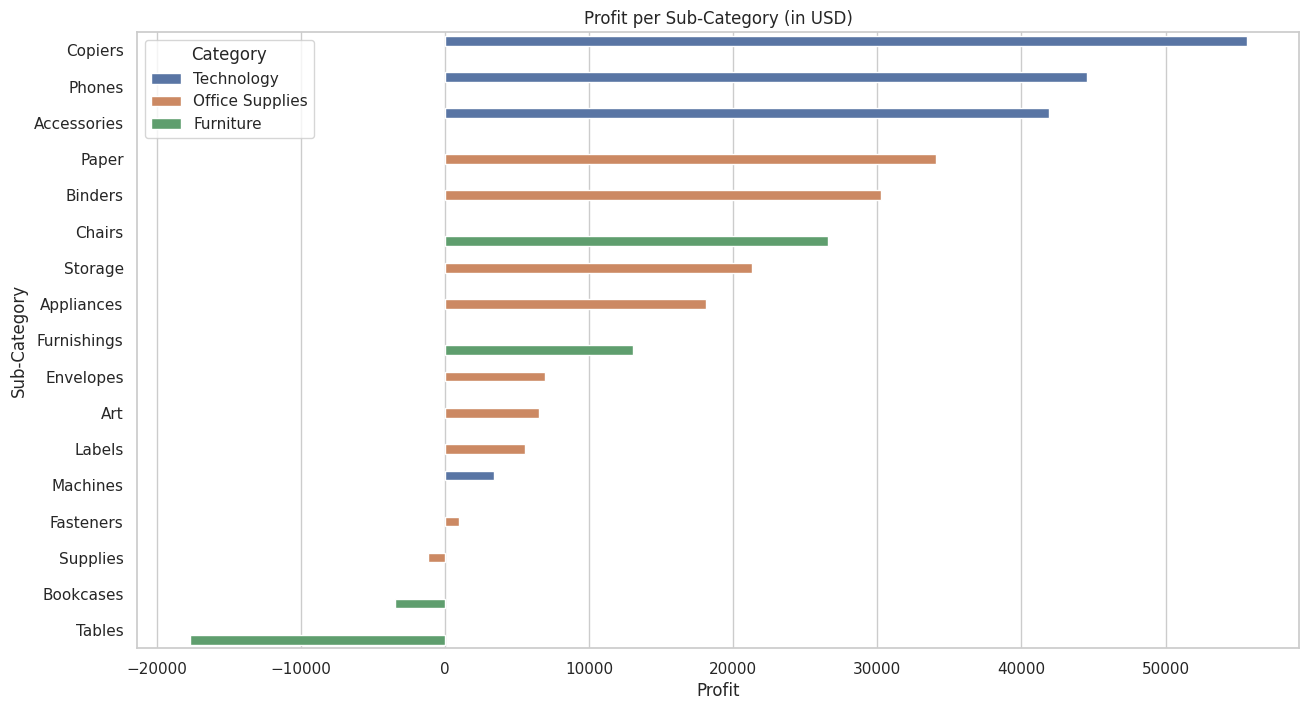

In [4]:
cat_analysis = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().reset_index()
cat_analysis = cat_analysis.sort_values('Profit', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Profit', y='Sub-Category', hue='Category', data=cat_analysis)
plt.title('Profit per Sub-Category (in USD)')
plt.show()

***Interpretation:*** Several observations emerge:
* The subcategories **Supplies**, **Bookcases**, and **Tables** do not generate profit. They are likely to lead to debt.
* Conversely, the subcategories **Copiers**, **Phones**, and **Accessories** are the most profitable.
* Overall, **the **Technology** category is the best represented. Therefore, this is the one that should be promoted**. However, **the Furniture category requires review**.

## 4. Customer Segment Analysis
This analysis will allow us to identify the most profitable customer segment.

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


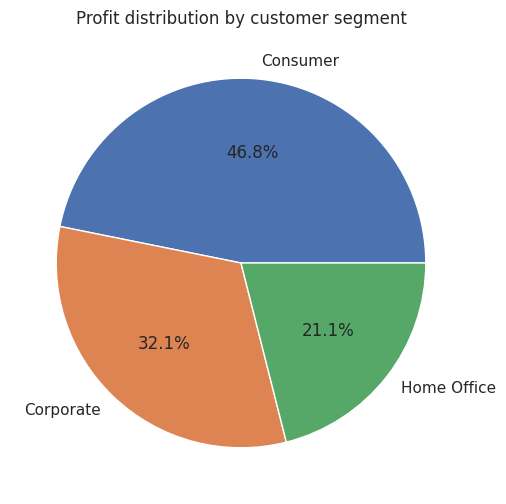

In [5]:
segment_analysis = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False)
display(segment_analysis)

segment_analysis['Profit'].plot(kind='pie', autopct='%1.1f%%', title='Profit distribution by customer segment')
plt.ylabel('')
plt.show()

***Interpretation:*** **Consumer is the most profitable segment**, followed by **Corporate**, and finally the segment **Home Office**.

## 5. Product Analysis (Top & Flop)
Specific products to target or discontinue.

In [6]:
product_analysis = df.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False)

print("--- TOP 10 Products (Profit) ---")
display(product_analysis.head(10))

print("\n--- FLOP 10 Products (Lost) ---")
display(product_analysis.tail(10))

--- TOP 10 Products (Profit) ---


,Sales,Profit
Product Name,,
Canon imageCLASS 2200 Advanced Copier,61599.824,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384,7753.0390
Hewlett Packard LaserJet 3310 Copier,18839.686,6983.8836
Canon PC1060 Personal Laser Copier,11619.834,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895,4094.9766
Ativa V4110MDD Micro-Cut Shredder,7699.890,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",14299.890,3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,9367.290,3696.2820
Ibico EPK-21 Electric Binding System,15875.916,3345.2823



--- FLOP 10 Products (Lost) ---


,Sales,Profit
Product Name,,
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,1706.250,-1148.4375
Balt Solid Wood Round Tables,6518.754,-1201.0581
Martin Yale Chadless Opener Electric Letter Opener,16656.200,-1299.1836
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,-1811.0784
GBC DocuBind P400 Electric Binding System,17965.068,-1878.1662
Bush Advantage Collection Racetrack Conference Table,9544.725,-1934.3976
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,9917.640,-2876.1156
Cubify CubeX 3D Printer Triple Head Print,7999.980,-3839.9904
Lexmark MX611dhe Monochrome Laser Printer,16829.901,-4589.9730


## 6. Advanced Analysis
In-depth analysis to better understand the dynamics.

### 6.1 Time Analysis (Trends)
We will determine how do sales and profit evolve over time.

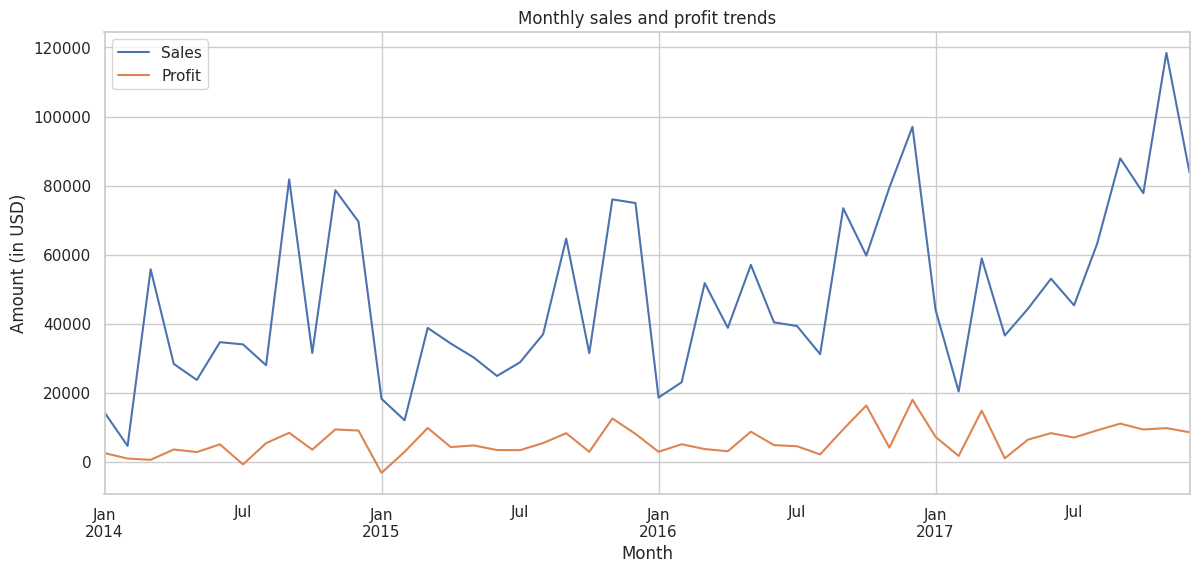

In [7]:
df['Order Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Order Month')[['Sales', 'Profit']].sum()

monthly_sales.plot(kind='line', figsize=(14, 6))
plt.title('Monthly sales and profit trends')
plt.xlabel('Month')
plt.ylabel('Amount (in USD)')
plt.show()

***Interpretation:***
- **November and December are generally the most favorable months for sales**, with **peaks in September**. However, **sales volume drops significantly in January and February**.
- Profit trends over time are fairly consistent. However, **January 2015 was the least profitable month**, while **October 2016, December 2016, and March 2017 were the most profitable**.
- **One detail worth noting:** In October 2016, sales declined, but profits remained high (comparable to December 2016, when sales were high). A similar trend was observed in March 2017, with sales volumes and profits nearly matching those of October 2016. We will conduct an in-depth analysis to understand the reasons behind these discrepancies.

In [8]:
# Extract months and years
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['YearMonth'] = df['Order Date'].dt.to_period('M')

In [9]:
print("\n" + "="*80)
print("KEY PERIODS COMPARISON")
print("="*80)

# Filter periods of interest
oct_2016 = df[(df['Year'] == 2016) & (df['Month'] == 10)]
dec_2016 = df[(df['Year'] == 2016) & (df['Month'] == 12)]
mar_2017 = df[(df['Year'] == 2017) & (df['Month'] == 3)]

# Create comparative summary
periods = {
    'October 2016': oct_2016,
    'December 2016': dec_2016,
    'March 2017': mar_2017
}

comparative_summary = []
for name, data in periods.items():
    comparative_summary.append({
        'Period': name,
        'Total Sales': data['Sales'].sum(),
        'Total Profit': data['Profit'].sum(),
        'Number of Orders': data['Order ID'].nunique(),
        'Number of Products': len(data),
        'Average Price': data['Sales'].mean(),
        'Average Profit': data['Profit'].mean(),
        'Average Discount': data['Discount'].mean()
    })

df_summary = pd.DataFrame(comparative_summary)
print(df_summary.to_string(index=False))


KEY PERIODS COMPARISON
       Period  Total Sales  Total Profit  Number of Orders  Number of Products  Average Price  Average Profit  Average Discount
 October 2016   59687.7450    16243.1425               105                 196     304.529311       82.873176          0.147194
December 2016   96999.0430    17885.3093               176                 352     275.565463       50.810538          0.135426
   March 2017   58872.3528    14751.8915               118                 238     247.362827       61.982737          0.130840


***Interpretation:*** December 20216 was a very difficult month in terms of overall profitability, compared to October 2016 and March 2017.

In [10]:
print("\n" + "="*80)
print("PROFIT MARGINS ANALYSIS")
print("="*80)

# Calculate margins
df_summary['Margin (%)'] = (df_summary['Total Profit'] / df_summary['Total Sales']) * 100
df_summary['Margin per Order (%)'] = (df_summary['Average Profit'] / df_summary['Average Price']) * 100

print("\nPROFIT MARGINS BY PERIOD:")
print(df_summary[['Period', 'Margin (%)', 'Margin per Order (%)']].to_string(index=False))

# Analyze margin distribution per transaction
print("\n\nMARGIN DISTRIBUTION PER TRANSACTION:")
for name, data in periods.items():
    data_temp = data.copy()
    data_temp['Transaction_Margin'] = (data_temp['Profit'] / data_temp['Sales']) * 100
    # Filter infinite or NaN values
    valid_margins = data_temp['Transaction_Margin'].replace([np.inf, -np.inf], np.nan).dropna()
    
    print(f"\n{name}:")
    print(f"  Median margin: {valid_margins.median():.2f}%")
    print(f"  Average margin: {valid_margins.mean():.2f}%")
    print(f"  Standard deviation: {valid_margins.std():.2f}%")
    print(f"  Number of transactions with margin > 30%: {(valid_margins > 30).sum()}")
    print(f"  Number of transactions with margin < 0% (losses): {(valid_margins < 0).sum()}")


PROFIT MARGINS ANALYSIS

PROFIT MARGINS BY PERIOD:
       Period  Margin (%)  Margin per Order (%)
 October 2016   27.213530             27.213530
December 2016   18.438645             18.438645
   March 2017   25.057418             25.057418


MARGIN DISTRIBUTION PER TRANSACTION:

October 2016:
  Median margin: 28.00%
  Average margin: 13.81%
  Standard deviation: 42.68%
  Number of transactions with margin > 30%: 83
  Number of transactions with margin < 0% (losses): 33

December 2016:
  Median margin: 27.50%
  Average margin: 15.40%
  Standard deviation: 40.08%
  Number of transactions with margin > 30%: 143
  Number of transactions with margin < 0% (losses): 58

March 2017:
  Median margin: 28.00%
  Average margin: 15.16%
  Standard deviation: 49.37%
  Number of transactions with margin > 30%: 108
  Number of transactions with margin < 0% (losses): 36


***Interpretation:***
* December 2016 was the month with the highest number of high-margin transactions (>30%): 143 transactions. But it was also the month with the highest number of losses (<0%): 58 transactions.
* Indeed, December 2016 saw an increase in sales volume (more total transactions). However, to generate this volume, the store clearly accepted far too many discounts (58 compared to 33 in October 2016 and 36 in March 2017), which diluted the overall profit. This is confirmed by the following analyses.

In [11]:
print("\n" + "="*80)
print("DISCOUNT IMPACT ANALYSIS")
print("="*80)

for name, data in periods.items():
    print(f"\n{name}:")
    
    # Segment by discount level
    data_temp = data.copy()
    data_temp['Discount_Level'] = pd.cut(data_temp['Discount'], 
                                        bins=[-0.01, 0, 0.1, 0.2, 0.5, 1],
                                        labels=['No discount', '0-10%', '10-20%', '20-50%', '>50%'])
    
    discount_impact = data_temp.groupby('Discount_Level', observed=True).agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Order ID': 'count'
}).round(2)
    
    print(discount_impact)
    
    # Calculate weighted average discount rate
    total_sales = data['Sales'].sum()
    weighted_discount = (data['Discount'] * data['Sales']).sum() / total_sales
    print(f"\nWeighted average discount rate: {weighted_discount*100:.2f}%")


DISCOUNT IMPACT ANALYSIS

October 2016:
                   Sales            Profit         Order ID
                     sum    mean       sum    mean    count
Discount_Level                                             
No discount     41026.81  402.22  16189.46  158.72      102
0-10%            1026.94  513.47    174.00   87.00        2
10-20%          13431.31  206.64   2405.86   37.01       65
20-50%           2909.42  323.27   -965.81 -107.31        9
>50%             1293.28   71.85  -1560.38  -86.69       18

Weighted average discount rate: 8.08%

December 2016:
                   Sales             Profit         Order ID
                     sum     mean       sum    mean    count
Discount_Level                                              
No discount     56277.79   307.53  17814.01   97.34      183
0-10%            4034.28  1008.57    612.49  153.12        4
10-20%          28566.21   226.72   2396.21   19.02      126
20-50%           7152.43   420.73  -2005.17 -117.95       

*We could delve even deeper into the analysis by examining profit margins in other months, particularly in December 2017 where it is even lower.*

### 6.2 Heatmap: Profit by Region and Category
Objective: To gain a clear overview of profitability hotspots

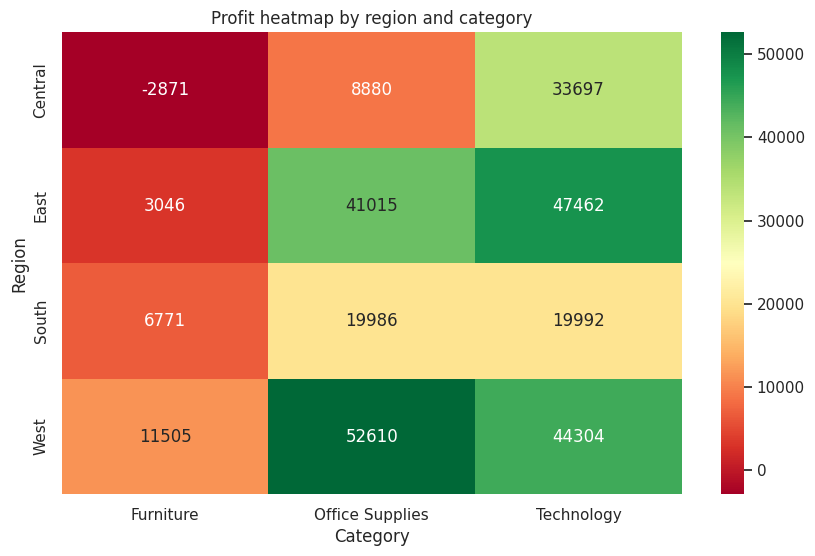

In [12]:
pivot_table = df.pivot_table(index='Region', columns='Category', values='Profit', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='RdYlGn')
plt.title('Profit heatmap by region and category')
plt.show()

***Interpretation:***
The heatmap above confirms the information already presented. Specifically:
- The Technology category is the most profitable, while Furniture is less so.
- The West region is the most profitable, unlike the South region.

Furthermore: The profit distribution by region and product category provides actionable insights regarding sales targets. For example, **Office Supplies products sell very well in the West region**. Conversely, **Furniture incurs losses in the Central region**.

## 7. Strategic Recommendations
1. Target the most profitable region, West.
2. Avoid or restructure the strategy in the Central region.
3. Promote products in the Copiers subcategory.
4. Pay attention to products in the Tables subcategory, which are generating significant losses.
5. Review specific products in the Flop 10 for potential discontinuation.
7. Analyze seasonality, as shown on the time chart, to optimize inventory levels.
8. Optimize loyalty programs (discounts) to improve profit margins.